# Question 1
The "standard deviation" measures the amount of variability or dispersion in the original dataset. It tells us how spread out the data points are around the mean.

The "standard error of the mean" quantifies how much the sample mean (calculated from the data) is expected to vary from the true population mean. It represents the variability of the sample mean from multiple samples (or bootstrapped samples) and decreases as the sample size increases. 

In essence:
- **Standard deviation** captures the spread of individual data points.
- **Standard error of the mean** captures the precision of the sample mean as an estimate of the population mean.

The SEM is always smaller than the standard deviation when based on the same data.

# Question 2
To create a 95% confidence interval using the "standard error of the mean" (SEM), follow this simple procedure:

1. **Calculate the sample mean**: First, determine the mean of the sample data.
2. **Determine the SEM**: Calculate the standard error of the mean, which is the standard deviation of the sample means.
3. **Multiply the SEM by 2**: Since roughly 95% of the values fall within 2 standard deviations (or SEMs) of the mean in a normal distribution, we use this factor to build the confidence interval.
4. **Create the confidence interval**: The 95% confidence interval is then found by taking the sample mean and adding and subtracting 2 times the SEM:
   
   Confidence Interval = Sample Mean ± 2 × SEM
   
This interval gives us a range where we expect 95% of the bootstrapped sample means to fall.

# Question 3
To create a 95% bootstrapped confidence interval using the bootstrapped means (without calculating the standard error), follow this procedure:

1. **Generate bootstrapped samples**: Draw multiple samples (with replacement) from the original data, where each sample has the same size as the original dataset.
2. **Calculate the mean for each bootstrapped sample**: For each bootstrapped sample, calculate the sample mean. This will give you a distribution of bootstrapped sample means.
3. **Use the `np.quantile(...)` function**: To create a 95% confidence interval, you need to capture the central 95% of these bootstrapped sample means. The `np.quantile(...)` function can help:
   - Find the 2.5th percentile (lower bound) using `np.quantile(boot_means, 0.025)`.
   - Find the 97.5th percentile (upper bound) using `np.quantile(boot_means, 0.975)`.
4. **Confidence interval**: The interval between these two percentiles will give you the 95% bootstrapped confidence interval. This means 95% of the bootstrapped sample means fall within this range.

This method doesn't rely on standard deviation or the standard error but directly uses the bootstrapped sample means to form an exact 95% coverage.

### Why do we use this approach?
This bootstrapped confidence interval approach is more flexible because it doesn't assume a normal distribution for the sample means. Instead, it relies entirely on the empirical distribution of the bootstrapped means, making it a non-parametric method.

### On sample size:
We use bootstrapped samples of the same size as the original sample because we want each bootstrapped sample to mimic the original sampling process. Bootstrapping **with replacement** allows us to simulate variability in repeated sampling. If we sampled without replacement, we'd just get the original data, which doesn't allow us to assess variability.

In [1]:
# Question 4

import numpy as np

# Define the function to compute the bootstrap confidence interval
def bootstrap_confidence_interval(data, statistic_function=np.mean, num_bootstrap_samples=1000, ci_percentile=95):
    # Number of observations in the original sample
    n = len(data)

    # Create an array to store the bootstrap statistics
    bootstrap_statistics = np.empty(num_bootstrap_samples)

    # Generate bootstrap samples and compute the statistic for each
    for i in range(num_bootstrap_samples):
        # Generate a bootstrap sample by resampling with replacement from the original data
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        
        # Compute the desired statistic for the bootstrap sample
        bootstrap_statistics[i] = statistic_function(bootstrap_sample)
    
    # Compute the percentiles for the confidence interval
    lower_percentile = (100 - ci_percentile) / 2
    upper_percentile = 100 - lower_percentile
    
    # Calculate the confidence interval
    confidence_interval = np.percentile(bootstrap_statistics, [lower_percentile, upper_percentile])

    return confidence_interval

# Example usage:
# Let's make up a sample of data
sample_data = np.array([12, 15, 14, 10, 8, 16, 13, 9, 11, 17])

# Compute the 95% confidence interval for the population mean
mean_confidence_interval = bootstrap_confidence_interval(sample_data, statistic_function=np.mean)
print("95% Confidence Interval for the mean:", mean_confidence_interval)

# To compute the 95% confidence interval for the population median instead:
median_confidence_interval = bootstrap_confidence_interval(sample_data, statistic_function=np.median)
print("95% Confidence Interval for the median:", median_confidence_interval)

95% Confidence Interval for the mean: [10.9 14.1]
95% Confidence Interval for the median: [10. 15.]


# Chatbot Link(Q1-4)
### https://chatgpt.com/share/66fb44d6-1fd8-8012-a185-e27b5263d0b5

# Chatbot Summary(Q1-4)
1. **Standard Error of the Mean vs. Standard Deviation**:
   - The **standard deviation** measures the variability of the original data, showing how spread out individual data points are around the mean.
   - The **standard error of the mean (SEM)** measures how much the sample mean is expected to vary from the true population mean. It represents the variability of sample means across repeated samples and decreases as sample size increases.

2. **Variability of Means in Bootstrapping**:
   - As **sample size increases**, the variability of the means of bootstrapped samples decreases. Small samples have high variability, while larger samples produce more consistent means because they better represent the population.

3. **Creating a Confidence Interval Using SEM**:
   - To create a **95% confidence interval** using the SEM, calculate the sample mean and SEM, then use:
     \[
     \text{Confidence Interval} = \text{Sample Mean} \pm 2 \times \text{SEM}
     \]
   - This method provides an approximate range where 95% of the bootstrapped means will fall.

4. **Bootstrapped Confidence Interval Using Percentiles**:
   - To create a **95% bootstrapped confidence interval** without using the standard error, follow these steps:
     1. Generate multiple bootstrapped samples of the same size as the original data.
     2. Calculate the mean of each bootstrapped sample.
     3. Use the `np.quantile(...)` function to find the 2.5th and 97.5th percentiles of the bootstrapped means, giving you the exact 95% confidence interval.
   - This method is more accurate because it directly uses the distribution of bootstrapped means, without relying on assumptions about normality.


# Question 5
When constructing confidence intervals, it's crucial to distinguish between population parameters and sample statistics because they serve different roles:

- **Population Parameter**: This is the true, fixed value that describes a characteristic of the entire population (e.g., the population mean or median). We rarely know this value because we usually can't access the entire population.
  
- **Sample Statistic**: This is an estimate of the population parameter, calculated from a sample drawn from the population (e.g., the sample mean or median). Since the sample is just a subset of the population, the sample statistic is subject to random variation.

A **confidence interval** is used to provide a range of values within which we believe the true population parameter lies, based on the sample statistic. The distinction is important because we use sample statistics to infer or estimate population parameters, and confidence intervals help quantify the uncertainty around that estimate.

In short: we compute a confidence interval around the **sample statistic** (our estimate) to provide plausible values for the **population parameter** (the true, unknown value).

# Question 6
### What is the process of bootstrapping?

Bootstrapping is a method in statistics where you take a sample of data and use that sample to create many new “resampled” datasets by randomly picking data points from the original sample **with replacement**. Basically, you shuffle the sample and pick random values, but some values might get picked multiple times, while others might not get picked at all. 

Once you have all these new resampled datasets, you calculate whatever statistic you're interested in (like the mean, median, etc.) for each of them. After that, you look at the spread of all these statistics to get an idea of how much uncertainty there is in your original sample’s statistic. It’s kind of like saying, "Hey, if I had gotten slightly different data, how much would my results change?"

### What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to **estimate the uncertainty or variability** in a sample statistic (like the sample mean, median, etc.) when you don’t have access to the whole population. Since you don’t know the true population values, you use bootstrapping to get an idea of the possible range of the population parameter based on your sample.

It’s especially useful when you don’t know how your data is distributed or when you have a small sample. Bootstrapping allows you to avoid making too many assumptions and still get a sense of the reliability of your estimates.

### How could you use bootstrapping to assess whether your (hypothesized) guess about the average of a population might be plausible?

Let’s say you have a sample from a population, and you’re wondering if your guess about the average (hypothetical population mean) is reasonable. Here’s how you could use bootstrapping to test that:

1. **Take your sample**: You already have a sample of size *n*.
   
2. **Resample using bootstrapping**: Use bootstrapping to generate a large number of resamples from your sample. For each resample, you calculate the sample mean.

3. **Create a confidence interval**: Once you have all these means from your resampled datasets, you can create a **bootstrap confidence interval**—basically the range where most of these means fall.

4. **Compare your guess to the confidence interval**: Check if your hypothesized guess falls inside this confidence interval. If it does, it suggests your guess is plausible because it’s within the range of possible values. If your guess falls outside the interval, it’s a sign that your guess might not be reasonable given the sample data you have.


# Question 7
When we say that the confidence interval for a sample statistic (like the sample mean) "covers zero," it means that zero is a plausible value for the true population parameter (the population mean in this case). In the context of hypothesis testing, this relates to the **null hypothesis**:

- **Null Hypothesis (\(H_0\))**: The average effect (population mean) is zero, meaning the drug has no effect on average.
- **Alternative Hypothesis (\(H_A\))**: The average effect (population mean) is not zero, meaning the drug does have an effect.

### Why Does a Confidence Interval Overlapping Zero Fail to Reject the Null Hypothesis?

A confidence interval provides a range of plausible values for the true population parameter based on the sample data. If this range includes zero, we cannot confidently say that the population mean is different from zero. Even though the observed sample mean might not be zero, the uncertainty around the sample mean (reflected by the confidence interval) suggests that zero is still a plausible value for the true population mean.

In other words, because the confidence interval includes zero, we don't have enough evidence to reject the null hypothesis that the drug has no effect **on average**. We are acknowledging that, given the variability in the sample, it's possible that the true average effect of the drug is still zero.

### What Would Lead to Rejecting the Null Hypothesis?

If the confidence interval **does not include zero**, it means that zero is not a plausible value for the population mean based on the sample. In this case, we would have enough evidence to conclude that the population mean is different from zero and, therefore, **reject the null hypothesis**. This suggests that the drug does have an effect (either positive or negative), and we can be reasonably confident that the average effect is not zero.

### In Summary:

- If zero is within the confidence interval, we fail to reject the null hypothesis because zero is still a possible value for the population mean.
- If zero is **not** within the confidence interval, we reject the null hypothesis, indicating the drug likely has an effect on average.

This process is key to understanding how we use statistics to infer population parameters from sample data, balancing our findings against the variability and uncertainty that naturally come with sampling.

# Chatbot Link (Q5-7)
### https://chatgpt.com/share/66fb4659-7410-8012-92ec-0a8e148dd9b4

# Chatbot Summary (Q5-7)
---
1. **Bootstrap Confidence Interval Code**: 
   - We started by discussing how to write Python code to generate a 95% bootstrap confidence interval for a population mean. I provided you with sample code, and we explored how you can modify it to calculate the confidence interval for other statistics, like the median. The key takeaway was that bootstrapping helps estimate the uncertainty around a sample statistic by resampling from the data.

2. **Understanding Population Parameters and Sample Statistics**: 
   - We discussed the importance of distinguishing between population parameters and sample statistics in the context of confidence intervals. You learned that population parameters are the true, fixed values (like the population mean), while sample statistics are estimates based on a sample. A confidence interval is constructed around the sample statistic to estimate where the true population parameter lies.

3. **Explaining Bootstrapping**: 
   - I explained the process of bootstrapping informally, describing it as a method of resampling with replacement from a sample to generate many possible datasets. This allows us to estimate the variability of sample statistics. The main purpose of bootstrapping is to provide a sense of uncertainty around the estimates when we don’t know the exact population parameters.
   
4. **Using Bootstrapping to Test a Hypothesis**: 
   - We also discussed how you could use bootstrapping to assess whether a hypothesized population mean is plausible. By resampling and creating a confidence interval, you can see whether the hypothesized value falls within that interval. If it does, the hypothesis may be plausible; if not, the hypothesis may not be reasonable.

5. **Confidence Intervals and Hypothesis Testing**: 
   - Finally, we addressed the concept of using confidence intervals in hypothesis testing, specifically regarding the idea of "failing to reject the null hypothesis." When the confidence interval overlaps with zero, it suggests that zero (or no effect) is still a plausible value, so we fail to reject the null hypothesis. Conversely, if the confidence interval doesn’t include zero, we reject the null, indicating that the population parameter likely differs from zero.

---

Mean Difference: 3.3107300000000004
95% Confidence Interval: [0.9 5.6]


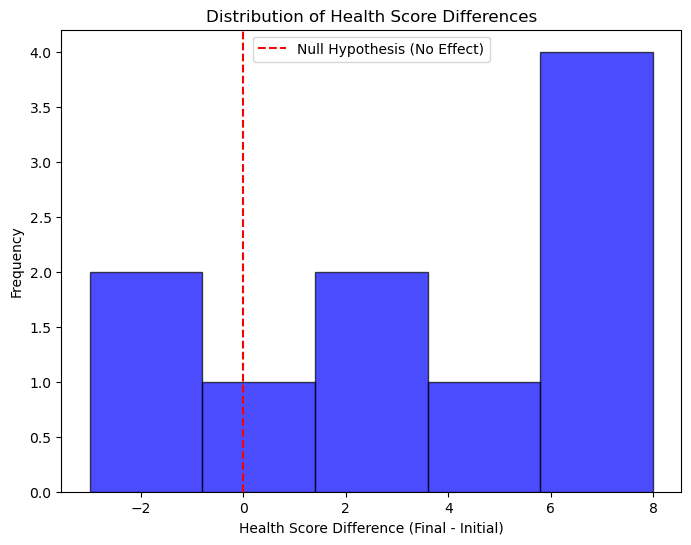

In [4]:
# Question 8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Create the CSV data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the difference in health scores
df['HealthScoreDiff'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrap function
def bootstrap_mean_diff(data, n_bootstrap=10000):
    boot_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    return np.percentile(boot_means, [2.5, 97.5]), np.mean(boot_means)

# Get the bootstrap confidence interval for the mean difference
conf_interval, mean_diff = bootstrap_mean_diff(df['HealthScoreDiff'])

# Output results
print(f"Mean Difference: {mean_diff}")
print(f"95% Confidence Interval: {conf_interval}")

# Visualizations
plt.figure(figsize=(8, 6))
plt.hist(df['HealthScoreDiff'], bins=5, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='Null Hypothesis (No Effect)')
plt.title('Distribution of Health Score Differences')
plt.xlabel('Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Question 8

### 1. Quantitative Analysis
#### **Methodology**
I use bootstrapping to evaluate the difference in health scores:
1. **Paired Differences**: Calculate the difference between final and initial health scores for each patient.
2. **Bootstrapping**: Randomly sample with replacement from the paired differences to create a bootstrap distribution of the mean difference. This will allow you to generate a confidence interval for the difference.
3. **Null Hypothesis Test**: Use the confidence interval to test the null hypothesis. If the confidence interval for the mean difference contains zero, you fail to reject the null hypothesis; otherwise, you reject it.

#### **Method Explanation**
- Bootstrapping provides a way to estimate the sampling distribution of a statistic (like the mean difference) by resampling with replacement. This helps to create confidence intervals and assess the uncertainty of your estimate.


### 2. Findings and Discussion
- **Visual Insight**: The histogram of health score differences shows whether there's a general increase or decrease in health scores post-vaccine.
- **Mean Difference**: The mean difference of health scores can be compared to zero.
- **Bootstrap Results**: If the 95% confidence interval for the mean difference excludes zero, the vaccine appears to have a statistically significant effect on health scores.

### 3. Conclusion
Based on the bootstrapped confidence interval, you will draw your conclusion:
- **Reject Null Hypothesis**: If zero is outside the confidence interval, the vaccine is likely effective.
- **Fail to Reject Null Hypothesis**: If zero is within the interval, there's insufficient evidence to conclude that the vaccine is effective.

### 4. Further Considerations
- **Gender or Age Bias**: Consider analyzing if there is any significant effect based on gender or age groups.
- **Additional Data**: A larger dataset or a placebo-controlled group could provide more robust evidence.


# Chatbot Link(Q8)
### https://chatgpt.com/share/66fb4563-a1a8-8012-ac6e-78ef83d71808

# Chatbot Summary(Q8)

### Exchange Summary:

1. **Initial Task Description**: 
   - You shared details about the assignment, which involves analyzing data provided by AliTech to determine the effectiveness of a new vaccine.
   - The dataset includes patient IDs, ages, genders, initial health scores, and final health scores.
   - You asked for assistance in structuring the analysis, focusing on bootstrapping methods and hypothesis testing.

2. **Suggested Structure for Analysis**:
   - **Problem Introduction**: Describing the goal of evaluating the vaccine's effectiveness and defining the null hypothesis (H₀: no effect).
   - **Data Visualization**: Ideas for visualizations, including boxplots, scatter plots, and histograms, to compare initial and final health scores.
   - **Quantitative Analysis**: Proposal to use bootstrapping to estimate the mean difference in health scores (Final - Initial). A null hypothesis test would be based on whether zero lies within the confidence interval.
   - **Methodology Code**: Provided Python code for:
     - Creating the dataset from the CSV.
     - Calculating the paired differences in health scores.
     - Running the bootstrapping process to create a 95% confidence interval.
     - Visualizing the distribution of health score differences.
   - **Findings and Discussion**: You would interpret whether the vaccine had a statistically significant effect based on the confidence interval.
   - **Conclusion**: Guidance on concluding whether to reject or fail to reject the null hypothesis, based on the results.

3. **Code and Output**:
   - Python code was provided for data visualization, bootstrapping analysis, and calculating the mean difference and confidence intervals for health score changes.
   - Instructions were given to make the analysis reproducible by using `np.random.seed()`.

4. **Further Considerations**:
   - Suggestions were made for additional analysis, such as investigating possible gender or age biases and considering the use of a placebo group for more robust evidence.

---

This summary encapsulates the main points from our interactions and can be submitted as part of your homework assignment. Let me know if any additional details are required.

# Question 9
**Yes**